## Question 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import PIL
from PIL import Image
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
dataset = mnist.load_data()

In [3]:
(X_train,y_train),(X_test,y_test) = dataset

In [4]:
np.shape(X_train)

(60000, 28, 28)

In [5]:
np.shape(y_train)

(60000,)

In [ ]:
X_train = X_train.reshape(X_train.shape[0],1296)
X_test = X_test.reshape(X_test.shape[0],1296)

ValueError: ignored

In [6]:
X_train = X_train.reshape(X_train.shape[0],784)
X_test = X_test.reshape(X_test.shape[0],784)

## The range of pixel values for a normal lmage is usually around 0-255, to convert this image matrix into a grayscale matrix first then a grayscale image, we'll divide the elements of this array/matrix with 255 as the individual values of a grayscaled image lies in the range 0-255

In [7]:
#We can't divide an integer matrix with 255 as the resultant value is probably going to be in float, so we first convert our matrix to
#a float matrix, then we divide the matrix by 255 itself to get a grayscale matrix

X_train = X_train.astype('float')
X_test = X_test.astype('float')

X_train = X_train/255
X_test = X_test/255

In [8]:
no_classes = len(np.unique(y_train))

no_classes

10

In [9]:
y_train = to_categorical(y_train,no_classes)

y_test = to_categorical(y_test,no_classes)

In [10]:
inp_shape = (784,)

In [13]:
model = Sequential()
model.add(Dense(200,input_shape=inp_shape,activation='sigmoid'))
model.add(Dense(100,activation='sigmoid'))
model.add(Dense(50,activation='sigmoid'))
model.add(Dense(no_classes,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               157000    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 182,660
Trainable params: 182,660
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.fit(X_train,y_train, validation_split=0.3, epochs=5)

Train on 42000 samples, validate on 18000 samples
Epoch 1/5
42000/42000 [==============================] - 11s 253us/sample - loss: 0.6325 - acc: 0.8356 - val_loss: 0.2593 - val_acc: 0.9272
Epoch 2/5
42000/42000 [==============================] - 10s 229us/sample - loss: 0.2092 - acc: 0.9415 - val_loss: 0.1790 - val_acc: 0.9482
Epoch 3/5
42000/42000 [==============================] - 10s 227us/sample - loss: 0.1418 - acc: 0.9591 - val_loss: 0.1502 - val_acc: 0.9559
Epoch 4/5
42000/42000 [==============================] - 10s 236us/sample - loss: 0.1026 - acc: 0.9700 - val_loss: 0.1284 - val_acc: 0.9632
Epoch 5/5
42000/42000 [==============================] - 9s 224us/sample - loss: 0.0779 - acc: 0.9776 - val_loss: 0.1243 - val_acc: 0.9633


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([[5.2425574e-05, 3.0174328e-04, 3.5729015e-04, ..., 9.9882025e-01,
        1.6226797e-05, 1.3912811e-04],
       [4.0877285e-06, 1.2958961e-03, 9.9752170e-01, ..., 1.0552852e-04,
        2.6763426e-04, 1.8026780e-06],
       [4.8705056e-06, 9.9829096e-01, 3.1388944e-04, ..., 9.0798119e-04,
        1.2576159e-04, 1.9683681e-05],
       ...,
       [5.1826100e-06, 8.4546431e-05, 1.0653256e-04, ..., 6.8061752e-04,
        1.2898422e-04, 2.2024687e-03],
       [1.8459146e-05, 4.4563851e-05, 1.4716536e-05, ..., 5.3882909e-06,
        1.6269786e-03, 2.1045382e-06],
       [2.1070764e-04, 7.8686979e-05, 1.3960940e-04, ..., 1.5781752e-06,
        9.5550524e-05, 9.0075781e-07]], dtype=float32)

In [ ]:
y_pred = y_pred.astype('int')

In [ ]:
y_pred

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
history1 = model.fit(X_train,y_train, validation_split=0.3, epochs=3)

Epoch 1/3
1313/1313 [==============================] - 10s 6ms/step - loss: 0.6298 - acc: 0.8318 - val_loss: 0.2568 - val_acc: 0.9279
Epoch 2/3
1313/1313 [==============================] - 7s 5ms/step - loss: 0.2012 - acc: 0.9427 - val_loss: 0.1679 - val_acc: 0.9520
Epoch 3/3
1313/1313 [==============================] - 7s 5ms/step - loss: 0.1338 - acc: 0.9619 - val_loss: 0.1381 - val_acc: 0.9582


In [ ]:
training_loss = history1.history['loss']
test_loss = history1.history['val_loss']

In [ ]:
epoch_count = range(1, len(training_loss) + 1)

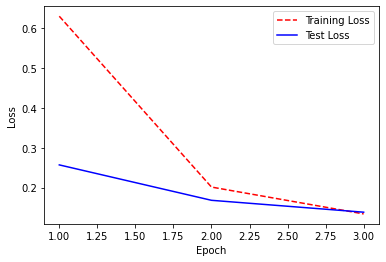

In [ ]:
# Visualizing the loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

Epoch 1/6
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0980 - acc: 0.9714 - val_loss: 0.1244 - val_acc: 0.9620
Epoch 2/6
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0753 - acc: 0.9782 - val_loss: 0.1145 - val_acc: 0.9659
Epoch 3/6
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0578 - acc: 0.9837 - val_loss: 0.1369 - val_acc: 0.9600
Epoch 4/6
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0470 - acc: 0.9867 - val_loss: 0.1098 - val_acc: 0.9684
Epoch 5/6
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0366 - acc: 0.9895 - val_loss: 0.1097 - val_acc: 0.9689
Epoch 6/6
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0290 - acc: 0.9916 - val_loss: 0.0991 - val_acc: 0.9729


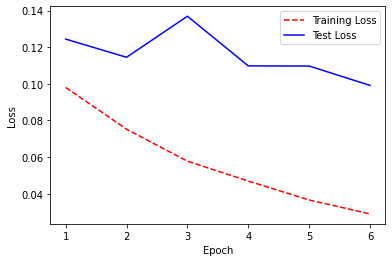

In [ ]:
history2 = model.fit(X_train,y_train, validation_split=0.3, epochs=6)

training_loss = history2.history['loss']
test_loss = history2.history['val_loss']
epoch_count = range(1, len(training_loss) + 1)

# Visualizing the loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

Epoch 1/9
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0232 - acc: 0.9939 - val_loss: 0.1066 - val_acc: 0.9723
Epoch 2/9
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0191 - acc: 0.9946 - val_loss: 0.1106 - val_acc: 0.9713
Epoch 3/9
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0158 - acc: 0.9956 - val_loss: 0.1117 - val_acc: 0.9719
Epoch 4/9
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0139 - acc: 0.9959 - val_loss: 0.1103 - val_acc: 0.9733
Epoch 5/9
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0094 - acc: 0.9976 - val_loss: 0.1179 - val_acc: 0.9716
Epoch 6/9
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0104 - acc: 0.9970 - val_loss: 0.1189 - val_acc: 0.9727
Epoch 7/9
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0105 - acc: 0.9968 - val_loss: 0.1235 - val_acc: 0.9725
Epoch 8/9
1313/1313 [==============================] - 8s 6ms/step - 

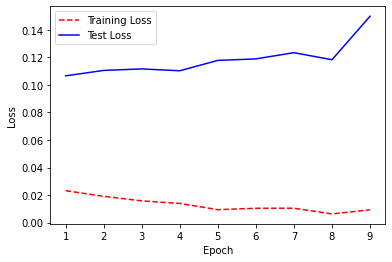

In [ ]:
history3 = model.fit(X_train,y_train, validation_split=0.3, epochs=9)

training_loss = history3.history['loss']
test_loss = history3.history['val_loss']
epoch_count = range(1, len(training_loss) + 1)

# Visualizing the loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

## Question 2

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
os.chdir('/content/drive/My Drive/HW5')

In [4]:
!unzip '/content/drive/My Drive/HW5/archie.zip'

Streaming output truncated to the last 5000 lines.
 extracting: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y2401_class0.png  
 extracting: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2401_y1101_class0.png  
 extracting: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2401_y1151_class0.png  
 extracting: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2401_y1201_class0.png  
 extracting: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2401_y1251_class0.png  
 extracting: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2401_y1301_class0.png  
 extracting: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2401_y1351_class0.png  
 extracting: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2401_y1401_class0.png  
 extracting: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2401_y1451_class0.png  
 extracting: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2401_y1501_class0.png  
 extracting: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2401_y1551_class0.png  
 extracting: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2401_y1601_class0.png  
 extracting: IDC_regular_

In [ ]:
#!unzip '/content/drive/My Drive/HW5/archive.zip'

Streaming output truncated to the last 5000 lines.
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1551_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1601_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1651_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1701_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1751_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1801_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1851_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1901_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1951_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y2001_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y2251_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y2301_class0.png  
  inflating: IDC_regular_

In [ ]:
files_path = '/content/drive/My Drive/HW5/'

os.listdir(files_path)

['10253',
 '10254',
 '10255',
 '10256',
 '10257',
 '10258',
 '10259',
 '10260',
 '10261',
 '10262',
 '10264',
 '10268',
 '10269',
 '10272',
 '10273',
 '10274',
 '10275',
 '10276',
 '10277',
 '10278',
 '10279',
 '10282',
 '10285',
 '10286',
 '10288',
 '10290',
 '10291',
 '10292',
 '10293',
 '10295',
 '10299',
 '10300',
 '10301',
 '10302',
 '10303',
 '10304',
 '10305',
 '10306',
 '10307',
 '10308',
 '12241',
 '12242',
 '12626',
 '12748',
 '12749',
 '12750',
 '12751',
 '12752',
 '12810',
 '12811',
 '12817',
 '12818',
 '12819',
 '12820',
 '12821',
 '12822',
 '12823',
 '12824',
 '12826',
 '12867',
 '12868',
 '12869',
 '12870',
 '12871',
 '12872',
 '12873',
 '12875',
 '12876',
 '12877',
 '12878',
 '12879',
 '12880',
 '12881',
 '12882',
 '12883',
 '12884',
 '12886',
 '12890',
 '12891',
 '12892',
 '12893',
 '12894',
 '12895',
 '12896',
 '12897',
 '12898',
 '12900',
 '12901',
 '12905',
 '12906',
 '12907',
 '12908',
 '12909',
 '12910',
 '12911',
 '12929',
 '12930',
 '12931',
 '12932',
 '12933']

In [ ]:
print(len(os.listdir(files_path)))

100


In [ ]:
#First let's check how the images actually look like

sample_image = Image.open('/content/drive/My Drive/HW5/10253/0/10253_idx5_x151_y1551_class0.png')

sample_image.show()